# Fast & slow modes

Volem resoldre el problema dels modes ràpid i lent de les equacios obtingudes a partir de la MHD ideal i de la linealització i posterior adimensionalització de les equacions.

<>:341: SyntaxWarning: invalid escape sequence '\o'
<>:387: SyntaxWarning: invalid escape sequence '\o'
<>:341: SyntaxWarning: invalid escape sequence '\o'
<>:387: SyntaxWarning: invalid escape sequence '\o'
/var/folders/pr/429w6vjs7g15jgb94g5_03_40000gn/T/ipykernel_13772/3515204025.py:341: SyntaxWarning: invalid escape sequence '\o'
  """ Relació de dispersió
/var/folders/pr/429w6vjs7g15jgb94g5_03_40000gn/T/ipykernel_13772/3515204025.py:387: SyntaxWarning: invalid escape sequence '\o'
  """ Anàlisi de la relació de dispersió


Number of unknowns: 6
Number of equations: 6
2025-04-28 16:13:37,951 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 13s, Remaining: 0s, Rate: 7.9e-02/s
evals.size (before)  260
evals.size (after removing inf)  260
evals.size (after removing < 0)  260

evals size 260
true_evals size  260
First 5 Eigenvalues (sqrt): [ 2.62441451  7.34787293  7.53730167  9.29494952 13.71111727]
First 5 True eigenvalues: [ 2.66901857  7.37232117  7.55178196  9.34725317 13.9452195 ]
Relative error: [0.01671178 0.00331622 0.00191747 0.00559562 0.01678727]


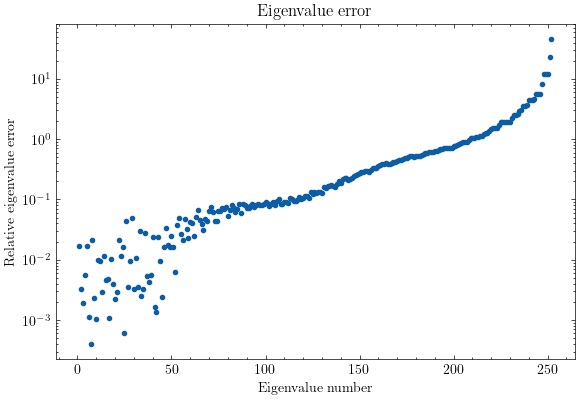

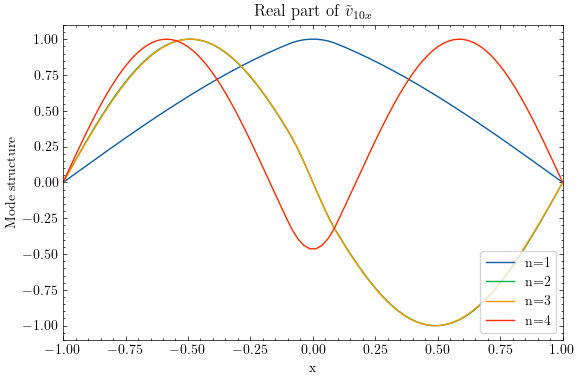

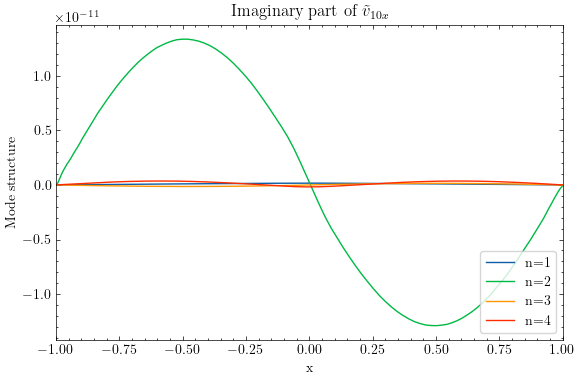

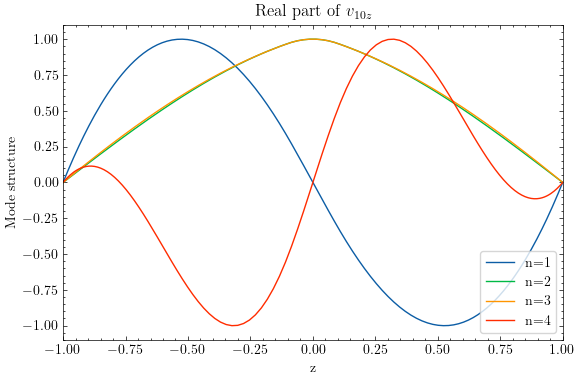

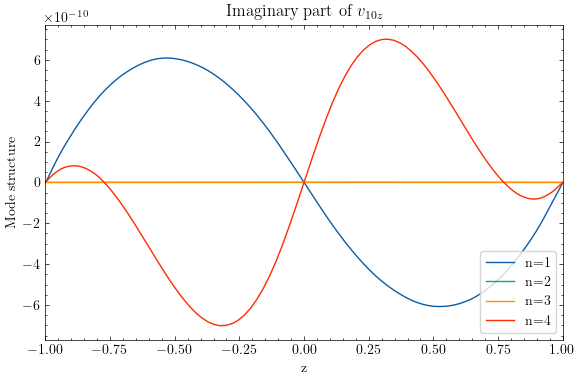

' Anàlisi de la relació de dispersió \n# Inicialitzar un diccionari per emmagatzemar els valors de kz on es produeix l\'increment dràstic\ndrastic_increase_points = {}\n\n# Definir un llindar per detectar increments dràstics\nthreshold = 0.75  # Ajustar segons sigui necessari\n\n# Iterar sobre cada mode\nfor i in range(7):\n    omega = np.sqrt(evals_k[:, i].real)\n    kz_values = kz_list\n\n    # Calcular la derivada discreta de omega respecte a kz\n    d_omega_d_kz = np.diff(omega) / np.diff(kz_values)\n\n    # Trobar els índexs on la derivada supera el llindar\n    indices = np.where(d_omega_d_kz > threshold)[0]\n\n    # Crear un array per classificar cada interval segons el llindar\n    is_drastic = d_omega_d_kz > threshold  # True si increment dràstic, False si suau\n\n    # Emmagatzemar els valors de kz corresponents als increments dràstics\n\n    drastic_increase_points[f"Mode {i+1}"] = kz_values[indices + 1]  # +1 perquè diff redueix la longitud en 1\n    # Imprimir els resultat

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
from scipy.optimize import fsolve
import logging
logger = logging.getLogger(__name__)
import scienceplots
plt.style.use('science')



""" Funcions per calcular els autovalors exactes """
# Funcions den Monxo per calcular els autovalors exactes d'una corda amb densitat variable.
def dispersion_relation(omega):
    disprel_even = (np.sqrt(cp2)/np.sqrt(cc2)) * np.cos(omega * (xmax - xp) / np.sqrt(cc2)) * np.cos(omega * xp / np.sqrt(cp2)) - \
        np.sin(omega * (xmax - xp) / np.sqrt(cc2)) * np.sin(omega * xp / np.sqrt(cp2))
    disprel_odd = (np.sqrt(cp2)/np.sqrt(cc2)) * np.cos(omega * (xmax - xp) / np.sqrt(cc2)) * np.sin(omega * xp / np.sqrt(cp2)) + \
        np.sin(omega * (xmax - xp) / np.sqrt(cc2)) * np.cos(omega * xp / np.sqrt(cp2))
    disprel = disprel_even * disprel_odd
    return disprel

def dispersion_relation2(omega):
    disprel_even2 = (np.sqrt(vAp2)/np.sqrt(vAc2)) * np.cos(omega * (xmax - xp) / np.sqrt(vAc2)) * np.cos(omega * xp / np.sqrt(vAp2)) - \
        np.sin(omega * (xmax - xp) / np.sqrt(vAc2)) * np.sin(omega * xp / np.sqrt(vAp2))
    disprel_odd2 = (np.sqrt(vAp2)/np.sqrt(vAc2)) * np.cos(omega * (xmax - xp) / np.sqrt(vAc2)) * np.sin(omega * xp / np.sqrt(vAp2)) + \
        np.sin(omega * (xmax - xp) / np.sqrt(vAc2)) * np.cos(omega * xp / np.sqrt(vAp2))
    disprel2 = disprel_even2 * disprel_odd2
    return disprel2

def get_eigenvalues(Nevals):
    Nsol = 0
    omega0 = 1
    omega_step = 0.5
    exact_soln = np.array([])
    while Nsol < Nevals:
        sol = fsolve(dispersion_relation, omega0)
#         print('omega0, sol ', omega0, sol)
        sol2 = fsolve(dispersion_relation2, omega0)

        if sol > 0:
            exact_soln = np.append(exact_soln, sol)
            exact_soln = np.unique(exact_soln.round(decimals=8))
#         print('exact_soln, exact_soln**2 ', exact_soln, exact_soln**2)
#         print(exact_soln.size)
        if sol2 > 0:
            exact_soln = np.append(exact_soln, sol2)
            exact_soln = np.unique(exact_soln.round(decimals=8))

        Nsol = exact_soln.size
        omega0 = omega0 + omega_step
#    print('exact_soln ', exact_soln[0:5])
#    print('exact_soln**2 ', exact_soln**2)
    print()
    return exact_soln



""" Paràmetres """
Nx = 128 # amb 32 ja no és smooth...
dtype = np.complex128 # malla en la que es treballa: 128 complexes, ja que hem definit Nx = 128



""" Límits del domini """
xmax = 1
xmin = -1 # = -xmax
# Position of boundaries between different parts of the system (prominence and corona).
xp = 0.1
# xc ∈ [-1, -0.1], xc ∈ [0.1, 1]



""" Constants """
kz = 0.01
#B0 = 0

### Velocitats a trossos ###
cp2 = 1
cc2 = 6 # 6
vAp2 = 9 # 9
vAc2 = 36 # 36
# Valors realistes: cp2, cc2, vAp2, vAc2  137724550.89820358 27544910179.640717 3978873577.297384 795774715459.4768



""" Bases """
xcoord = d3.Coordinate('x')
dist = d3.Distributor(xcoord, dtype=dtype)
xbasis = d3.Legendre(xcoord, size=Nx, bounds=(xmin, xmax)) # Definim una base amb uns altres límits. Chebyshev menos error?



""" Camps """
### Velocitats ###
u = dist.Field(name='u', bases=xbasis) # u = field of the wave function - AUTOFUNCIÓ!!! - v10x bar, coplexa
w = dist.Field(name='w', bases=xbasis) # w = Velocity in the x direction   v10z - real
# Definesc la velocitat com en oceano: (u,v,w) per no liar subíndexos i derivades.

### Espai real ###
x = dist.local_grid(xbasis)

### Constants ###
c2 = dist.Field(name='c2', bases=xbasis) # c2 = Velocitat al quadrat ----- és interessant definir-la directament al quadrat ja que és un camp i així evitam fer c.evaluate()**2
c2['g'] = np.piecewise(x, [x < -xp, (-xp <= x) * (x <= xp), x > xp], [cc2, cp2, cc2]) # Representa la c^2 en l'espai real ('g') a trossos.
vA2 = dist.Field(name='vA2', bases=xbasis) # vA2 = Alfven velocity squared
vA2['g'] = np.piecewise(x, [x < -xp, (-xp <= x) * (x <= xp), x > xp], [vAc2, vAp2, vAc2]) # Representa la velocitat d'Alfven en l'espai real ('g') a trossos.

### Autovalors ###
s = dist.Field(name='s') # AUTOVALOR ω^2 = s

### Camps magnètics ###
#Bx = dist.Field(name='Bx', bases=xbasis) # Bx = Magnetic field in the x direction   B10x
#Bz = dist.Field(name='Bz', bases=xbasis) # Bz = Magnetic field in the z direction   B10z

### Densitats ###
#rho0 = dist.Field(name='rho0', bases=xbasis) # rho0 = Density of the plasma  ρ0
#rho10 = dist.Field(name='rho10', bases=xbasis) # rho = Variation density of the plasma   ρ10
#rho10['g'] = np.piecewise(x, [x < -xp, (-xp <= x) * (x <= xp), x > xp], [1, 1, 1]) # Representa la densitat en l'espai real ('g') a trossos.

### Auxiliars de les derivades ###
tau_1 = dist.Field(name='tau_1')
tau_2 = dist.Field(name='tau_2')
tau_3 = dist.Field(name='tau_3')
tau_4 = dist.Field(name='tau_4')



""" Derivatives """
### Derivades espacials ###
dx = lambda A: d3.Differentiate(A, xcoord) # Derivative operator
lift_basis = xbasis.derivative_basis(1)
lift = lambda A: d3.Lift(A, lift_basis, -1)
ux = dx(u) + lift(tau_1) # First-order reduction of the velocity in the x direction
uxx = dx(ux) + lift(tau_2) # Second-order reduction of the velocity in the x direction
wx = dx(w) + lift(tau_3) # First-order reduction of the velocity in the z direction
wxx = dx(wx) + lift(tau_4) # Second-order reduction of the velocity in the z direction
# No és convenient posar directament dx(u) a l'equació ja que faltaria el lift... s'ha de definir bé la derivada
# No definim derivada temporal ja que és un EVP!!!

# RESOLDRE PRIMER SUBSTITUINT Bx, Bx i RHO i només resolent 2 eqs... i 4 eqs de contorn, només resolem per u i w, eqs. (17') i (19')

# velocitat dedins menor que defora
# alfven major primer, després provar

# comparar amb kz = 0 les dues equacions han de ser ~ iguals
# provar amb kz = 0.01 i s'ha de modificar poc - petit acoblament de les velocitats



""" Problem """
### Problema d'ones ràpida i lenta (complet) ###
#problem = d3.EVP([u, w, Bx, Bz, rho0, rho10, tau_1, tau_2,], eigenvalue=s, namespace=locals())
#problem.add_equation("np.sqrt(s)*rho10 + rho0*(-wx - kz*w) =0 ") # (12)
#problem.add_equation("np.sqrt(s)*Bx = kz*B0*w") # (14)
#problem.add_equation("np.sqrt(s)*Bz = B0*ux") # (16)
#problem.add_equation("np.sqrt(s)*rho10*ux = -c2*rho10x ") # (17)
#problem.add_equation("np.sqrt(s)*rho10*w - c2*kz*rho10 - vA2*(rho/B0)*(kz*Bx -Bzx) = 0") # (19)

### Problema d'ones d'Alfvén ### ~ corda guitarra amb densitat variable
#problem = d3.EVP([u, tau_1, tau_2], eigenvalue=s, namespace=locals())
#problem.add_equation("s * u  +  vA2 * uxx  =  0") # (12)

### Problema d'ones ràpida i lenta (més treballat) ###
problem = d3.EVP([u, w, tau_1, tau_2, tau_3, tau_4], eigenvalue=s, namespace=locals()) # 2 equacions i 4 incògnites
# problem.add_equation("s * u  +  c2 * uxx  =  0") # (17') # amb kz = 0
# problem.add_equation("s * w  +  vA2 * wxx  =  0") # (19') # amb kz = 0. Hauríem d'obtenir una molt semblant a la (17') però amb la velocitat en z i la constant d'Alfvén
problem.add_equation("s * u  +  c2 * uxx  +  kz * c2 * wx  =  0") # (17')
problem.add_equation("vA2 * wxx  +  c2 * kz * ux  +  (-c2 * kz**2 - vA2 * kz**2 + s) * w  =  0") # (19')
problem.add_equation("u(x=xmin) = 0")
problem.add_equation("u(x=xmax) = 0")
problem.add_equation("w(x=xmin) = 0")
problem.add_equation("w(x=xmax) = 0")
print("Number of unknowns:", len(problem.variables))
print("Number of equations:", len(problem.equations))



""" Solve """
### Solver de Dedalus ###
solver = problem.build_solver()
#print(solver.subproblems)
solver.solve_dense(solver.subproblems[0])
evals = np.sort(solver.eigenvalues)

### Ajustament de les autofuncions ###
print('evals.size (before) ', evals.size)
#evals = evals[~np.isinf(evals)] # el ~ és un operador bitwise NOT, que retorna True si el valor és False i viceversa. En aquest cas elimina els valors infinits
print('evals.size (after removing inf) ', evals.size)
evals = evals[evals > 0] # eliminam els valors negatius
print('evals.size (after removing < 0) ', evals.size)
evals = np.sqrt(evals)

### Autovalors exactes ###
Nevals = evals.size
exact_soln = get_eigenvalues(Nevals)
n = 1 + np.arange(evals.size)
true_evals = exact_soln[0:evals.size]

### Error relatiu ###
relative_error = np.abs(evals - true_evals) / true_evals

### Autovalors ###
print('evals size', evals.size)
print("true_evals size ", true_evals.size)
#print("Evals", evals)
#print("True Evals", true_evals)

# Agafam la part real per fer un print més net
evals = evals.real
print("First 5 Eigenvalues (sqrt):", evals[:5])
print("First 5 True eigenvalues:", true_evals[:5])
print("Relative error:", relative_error[:5])



""" Plot """
# Plot error
plt.figure(figsize=(6, 4))
plt.semilogy(n, relative_error, '.')
plt.xlabel("Eigenvalue number")
plt.ylabel("Relative eigenvalue error")
plt.tight_layout()
plt.title("Eigenvalue error")
#plt.savefig("eigenvalue_error.pdf")
#plt.savefig("eigenvalue_error.png", dpi=200)


# Plot real part of v10x
plt.figure(figsize=(6, 4))
x = dist.local_grid(xbasis) # no acab d'entendre perquè es repeteix el domini... per si l'has tuneat penmig maybe
for n, idx in enumerate(np.argsort(solver.eigenvalues)[:4], start=1):
    solver.set_state(idx, solver.subsystems[0])
    #ug = u['g'].real
    #if np.max(np.abs(ug)) != 0:  # Avoid division by zero
    #    ug /= np.max(np.abs(ug))
    #plt.plot(x, ug, label=f"n={n}")

    ug = (u['g']).real / (u['g'][1]).real
    #print(u['g'][1])
    plt.plot(x, ug/np.max(np.abs(ug)), label=f"n={n}") # quan es normalitza es divideix per zero... pq hi ha una autofunció nul·la?
plt.xlim(-1, 1)
plt.legend(loc="lower right", frameon=True)
plt.ylabel(r"Mode structure")
plt.xlabel(r"x")
plt.title(r"Real part of $\tilde{v}_{10x}$") # idò és imaginària ---> desfassament temporal de 1/4 de període
plt.tight_layout()
plt.show()
# plt.savefig("real_eigenvectors_v10x~.pdf")
# plt.savefig("real_eigenvectors_v10x~.png", dpi=200)


# Bucle per normalització ug ò wg

# Representar autofuncions aprop del canvi de comportament per estudiar com canvia

# Plot imaginary part of v10x
plt.figure(figsize=(6, 4))
x = dist.local_grid(xbasis)
for n, idx in enumerate(np.argsort(solver.eigenvalues)[:4], start=1):
    solver.set_state(idx, solver.subsystems[0])
    # if u['g'][1] != 0:
        # ui = (u['g'] / u['g'][1]).imag
    # else:
        # ui = u['g'].imag  # Skip normalization
    #ug = u['g'].real
    #ui = u['g'].imag
    #if np.max(np.abs(ug)) != 0:  # Avoid division by zero
     #   ui /= np.max(np.abs(ug)) # Normalitzam per la part real (ug), que és molt major i no ens resulta en la mateixa autofunció

    #plt.plot(x, ui, label=f"n={n}")

    ug = (u['g'] / u['g'][1]).real
    ui = (u['g'] / u['g'][1]).imag
    plt.plot(x, ui/np.max(np.abs(ug)), label=f"n={n}") # no normalitzam pq ens divideix per 0 ### ara sí normalitzam
plt.xlim(-1, 1)
plt.legend(loc="lower right", frameon=True)
plt.ylabel(r"Mode structure")
plt.xlabel(r"x")
plt.title(r"Imaginary part of $\tilde{v}_{10x}$") # idò és real ---> desfassament temporal de 1/4 de període
plt.tight_layout()
plt.show()
# plt.savefig("imag_eigenvectors_v10x~.pdf")
# plt.savefig("imag_eigenvectors_v10x~.png", dpi=200)


# Plot real part of v10z
plt.figure(figsize=(6, 4))
x = dist.local_grid(xbasis)
for n, idx in enumerate(np.argsort(solver.eigenvalues)[:4], start=1):
    solver.set_state(idx, solver.subsystems[0])
    #wg = w['g'].real
    #if np.max(np.abs(wg)) != 0:  # Avoid division by zero
    #    wg /= np.max(np.abs(wg))
    #plt.plot(x, wg, label=f"n={n}")

    wg = (w['g'] / w['g'][1]).real
    plt.plot(x, wg/np.max(np.abs(wg)), label=f"n={n}")
plt.xlim(-1, 1)
plt.legend(loc="lower right", frameon=True)
plt.ylabel(r"Mode structure")
plt.xlabel(r"z")
plt.title(r"Real part of ${v}_{10z}$")
plt.tight_layout()
plt.show()
# plt.savefig("real_eigenvectors_v10z.pdf")
# plt.savefig("real_eigenvectors_v10z.png", dpi=200)

# Plot imaginary part of v10z
plt.figure(figsize=(6, 4))
x = dist.local_grid(xbasis)
for n, idx in enumerate(np.argsort(solver.eigenvalues)[:4], start=1):
    solver.set_state(idx, solver.subsystems[0])
    #wi = u['g'].imag
    #if np.max(np.abs(wi)) != 0:  # Avoid division by zero
    #    wi /= np.max(np.abs(wi)) # Normalitzam per la part real (wg), que és molt major i no ens resulta en la mateixa autofunció
    #plt.plot(x, wi, label=f"n={n}")

    wg = (w['g'] / w['g'][1]).real
    wi = (w['g'] / w['g'][1]).imag
    plt.plot(x, wi/np.max(np.abs(wg)), label=f"n={n}")
plt.xlim(-1, 1)
plt.legend(loc="lower right", frameon=True)
plt.ylabel(r"Mode structure")
plt.xlabel(r"z")
plt.title(r"Imaginary part of ${v}_{10z}$")
plt.tight_layout()
plt.show()
# plt.savefig("imag_eigenvectors_v10z.pdf")
# plt.savefig("imag_eigenvectors_v10z.png", dpi=200)
""" """

# Normalitzar al màxim de ug i wg...



# A l'hora de representar la part real de les autofuncions has de tenir clar que la velocitat u és en la direcció x i la w en z. També que v10x és imaginària i v10z és real.
# A més, el que es representa és la velocitat, no la corda en sí. Llavors un node implica velocitat nul·la: aquell punt no es mou.
# Els màxims i mínims són els punts on la velocitat és màxima, no és que la corda es deformi amb aquella forma.


""" Relació de dispersió
Nkz = 50 # Nombre de kz's
kz_list = np.linspace(0, 5, Nkz) # Hi ha Nkz's separats equidistantment entre 0 i 5
### Relació de dispersió ###
plt.figure(figsize=(10, 6))
evals_k = np.zeros((kz_list.size, evals.size), dtype=np.complex128)
for ik, kz in enumerate(kz_list):
    problem = d3.EVP([u, w, tau_1, tau_2, tau_3, tau_4], eigenvalue=s, namespace=locals())
    problem.add_equation("s * u  +  c2 * uxx  +  kz * c2 * wx  =  0") # (17')
    problem.add_equation("vA2 * wxx  +  c2 * kz * ux  +  (-c2 * kz**2 - vA2 * kz**2 + s) * w  =  0") # (19')
    problem.add_equation("u(x=xmin) = 0")
    problem.add_equation("u(x=xmax) = 0")
    problem.add_equation("w(x=xmin) = 0")
    problem.add_equation("w(x=xmax) = 0")

    solver = problem.build_solver()
    solver.solve_dense(solver.subproblems[0])

    evals_k[ik, :] = np.sort(solver.eigenvalues)

# Plot dispersion relation of the first 8 eigenvalues
for i in range(7):
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray']
    plt.plot(kz_list, np.sqrt(evals_k[:, i].real), '.', label=f"n={i+1}", color=colors[i % len(colors)])
plt.xlabel(r"$k_z$")
plt.ylabel(r"$\omega = \sqrt{s}$")
plt.title("Dispersion Relation")
plt.grid(True)    
plt.legend(loc="upper right", frameon=True, fontsize=8)
plt.show()

# Per veure amb més detall la relació de dispersió de cada mode la representam individualment.
#for i in range(7):
#    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray']
#    plt.plot(kz_list, np.sqrt(evals_k[:, i].real), '.', label=f"Mode {i+1}", color=colors[i % len(colors)])
#    plt.xlabel(r"$k_z$")
#    plt.ylabel(r"$\omega = \sqrt{s}$")
#    plt.title(f"Dispersion Relation for n = {i+1}")
#    plt.grid(True)
#    plt.show()
#plt.show()

# Baixar kz entre 1 i 1.5 per veure en detall es canvi!

"""

""" Anàlisi de la relació de dispersió 
# Inicialitzar un diccionari per emmagatzemar els valors de kz on es produeix l'increment dràstic
drastic_increase_points = {}

# Definir un llindar per detectar increments dràstics
threshold = 0.75  # Ajustar segons sigui necessari

# Iterar sobre cada mode
for i in range(7):
    omega = np.sqrt(evals_k[:, i].real)
    kz_values = kz_list

    # Calcular la derivada discreta de omega respecte a kz
    d_omega_d_kz = np.diff(omega) / np.diff(kz_values)

    # Trobar els índexs on la derivada supera el llindar
    indices = np.where(d_omega_d_kz > threshold)[0]

    # Crear un array per classificar cada interval segons el llindar
    is_drastic = d_omega_d_kz > threshold  # True si increment dràstic, False si suau

    # Emmagatzemar els valors de kz corresponents als increments dràstics

    drastic_increase_points[f"Mode {i+1}"] = kz_values[indices + 1]  # +1 perquè diff redueix la longitud en 1
    # Imprimir els resultats
    #print(f"Mode {i+1}: Increment dràstic a kz = {drastic_increase_points[f'Mode {i+1}']}")


colors_per_mode = {
    "Mode 1": ["blue"],
    "Mode 2": ["red", "blue", "blue","blue"],
    "Mode 3": ["blue", "red", "blue","blue"],
    "Mode 4": ["blue", "red", "blue","blue"],
    "Mode 5": ["blue", "red", "blue","blue"],
    "Mode 6": ["blue", "red", "blue","blue"],
    "Mode 7": ["blue", "blue", "blue","red"],}
# No està gaire ben fet pq només ens serveix per 7 modes... però bé

plt.figure(figsize=(10, 6))
for i in range(7):
    omega = np.sqrt(evals_k[:, i].real)
    kz_values = kz_list

    # Derivada discreta
    d_omega_d_kz = np.diff(omega) / np.diff(kz_values)

    # Classificació suau / dràstic
    is_drastic = d_omega_d_kz > threshold

    mode_label = f"Mode {i+1}"
    assigned_colors = colors_per_mode.get(mode_label, ["blue"])  # Default color black if missing

    # Controlar l'índex dels colors
    color_idx = 0

    for j in range(len(d_omega_d_kz)):
        if color_idx >= len(assigned_colors):
            color = "blue"  # Per seguretat, si falten colors
        else:
            color = assigned_colors[color_idx]

        plt.plot(kz_values[j:j+2], omega[j:j+2], '.', color=color, linewidth=2)

        # Només canviem de color si hi ha un canvi de zona
        if j < len(d_omega_d_kz) - 1:
            if is_drastic[j] != is_drastic[j+1]:
                color_idx += 1

# kz_list ens dona una llista amb els valors de kz equidistants entre 0 i 5
# kz_inc ens dona una llista amb els valors de kz on es produeix l'increment dràstic

# El que vull fer és definir un valor de llindar per detectar increments dràstics en la relació de dispersió
# i després definir una funció a trossos per separar les zones amb increments dràstics i sense increments dràstics
# i representar-ho en el gràfic de la relació de dispersió.

plt.xlabel(r"$k_z$")
plt.ylabel(r"$\omega = \sqrt{s}$")
plt.title(r"Dispersion Relation: F\&S modes")
#plt.ylim(8,10)
#plt.legend(loc="upper right", frameon=True, fontsize=8)
plt.grid(False)
plt.show()
"""

# Ficar els plots de les velocitats dins el for i representar les velocitats per cada kz... pot tardar bastant però crec que és el que he de fer!

# Tema apart: estic emprant ipynb per tant tots els triples # podrien ser entrades ò cel·les, no fa falta fer-ho tot en un. Per això ja hi ha es .py

# Comentari de prova per veure si funciona el canvi de directori de .git

In [ ]:
# Externs - defora major
# Interns - dedins ~ defora